In [45]:
import pandas as pd

df = pd.read_csv('penguins_size.csv')
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [46]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [47]:
# Drop rows with any missing values
df = df.dropna()

# Drop rows where 'sex' is not 'FEMALE' or 'MALE'
df = df[df['sex'].isin(['FEMALE', 'MALE'])]

# Confirm no missing values left
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [48]:
# begin one-hot encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [49]:
#encode island and sex
df = pd.get_dummies(df, columns=['island', 'sex'])
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [50]:
df.columns
df = df.astype({
    'island_Biscoe': int,
    'island_Dream': int,
    'island_Torgersen': int,
    'sex_FEMALE': int,
    'sex_MALE': int
})
df.head()

#convert the booleans from one hot to 1s and 0s

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [51]:
from sklearn.preprocessing import StandardScaler

# List your numerical columns
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
# Initialize the scaler
scaler = StandardScaler()

# Fit on the data and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,-0.896042,0.780732,-1.426752,-0.568475,0,0,1,0,1
1,0,-0.822788,0.119584,-1.069474,-0.506286,0,0,1,1,0
2,0,-0.676280,0.424729,-0.426373,-1.190361,0,0,1,1,0
4,0,-1.335566,1.085877,-0.569284,-0.941606,0,0,1,1,0
5,0,-0.859415,1.747026,-0.783651,-0.692852,0,0,1,0,1


In [52]:

# Split the dataset into training and testing sets
# X = features, y = target
# test_size=0.2 → 80% train, 20% test
# random_state → ensures the split is the same every time you run it (reproducibility)

# Re-define X and y after reloading/processing the DataFrame
X = df.drop('species', axis=1)  # Features (all columns except target)
y = df['species']               # Target (species)

# Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the sizes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



Training set size: (266, 9)
Testing set size: (67, 9)


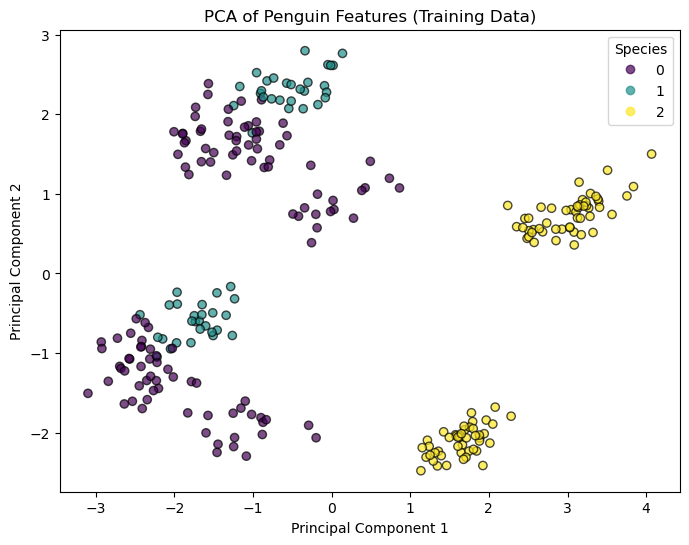

Explained variance ratio: [0.42484856 0.27762859]


In [53]:
# PCA for dimensionality reduction and visualization

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Standardize the features before PCA (important for PCA!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # scale the training features

# 2. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Plot the PCA result with color labels (species)
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Penguin Features (Training Data)')
plt.legend(*scatter.legend_elements(), title='Species')
plt.show()

# 4. Explained variance ratio (how much info each component retains)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


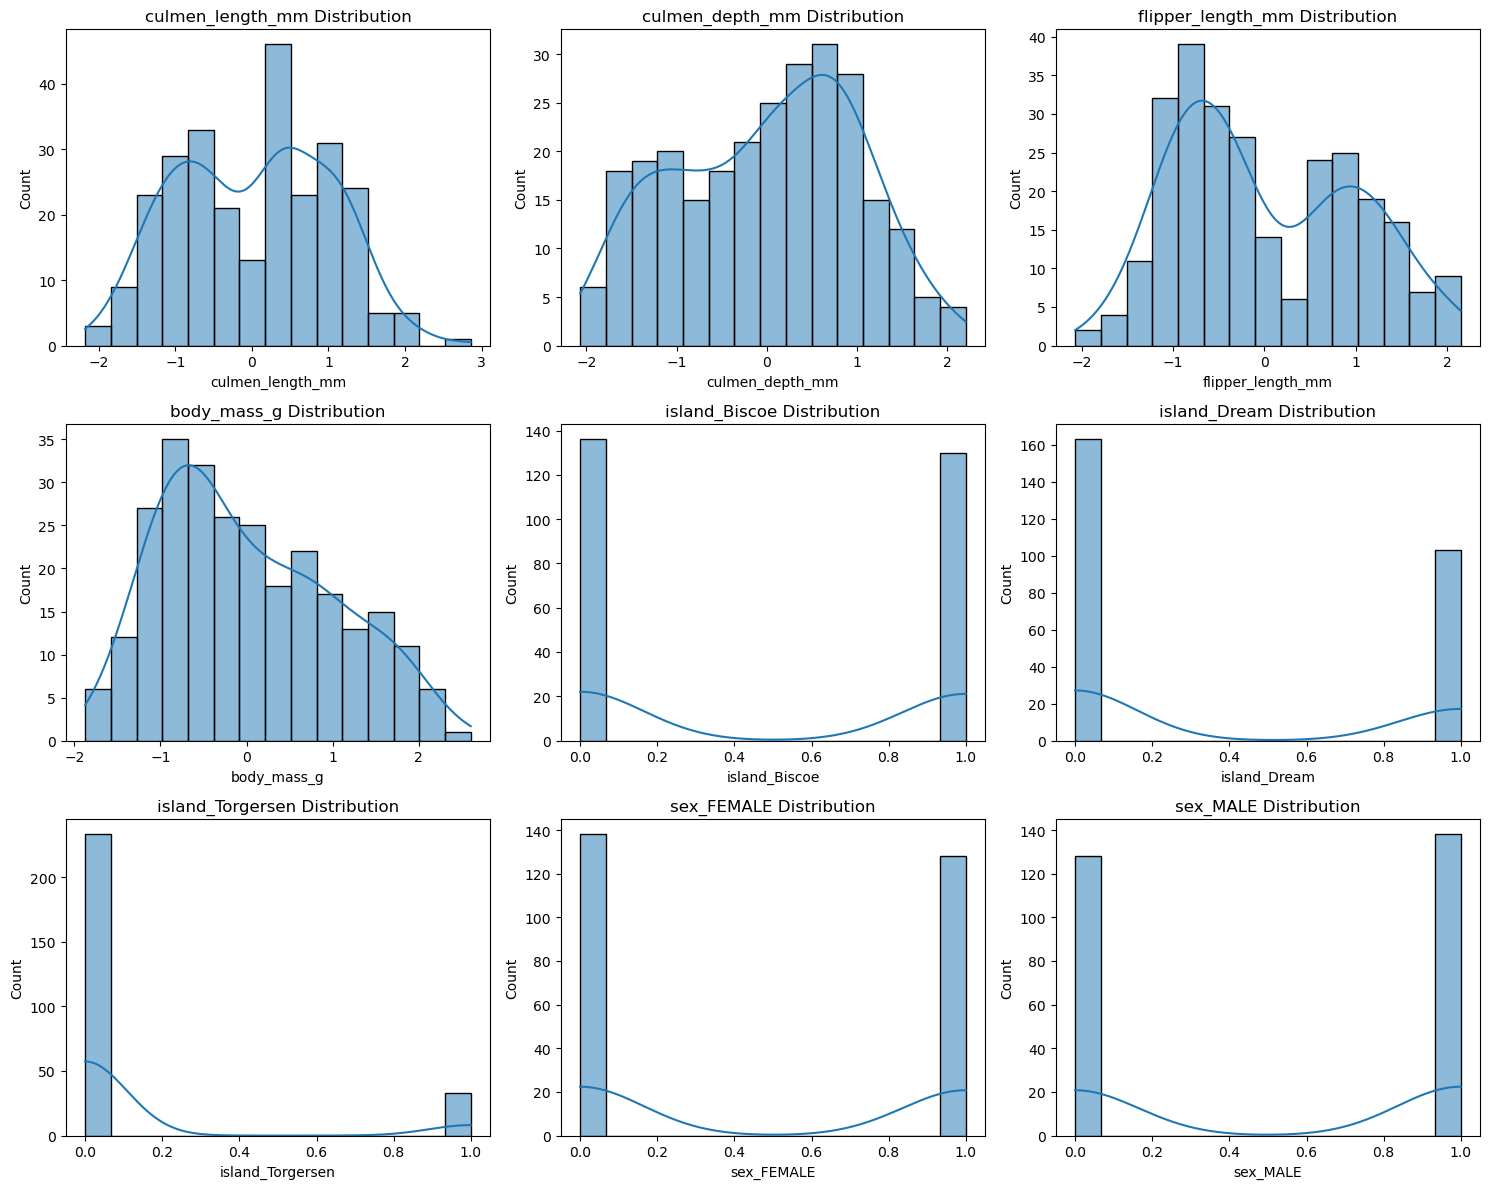

In [54]:
#VISUALIZING DATA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical features
num_features = X_train.columns

# Calculate grid size based on the number of features
n_features = len(num_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# Set up subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten axes array

# Plot each feature
for idx, feature in enumerate(num_features):
    sns.histplot(X_train[feature], kde=True, ax=axes[idx], bins=15)
    axes[idx].set_title(f'{feature} Distribution')

# Remove unused axes
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


c:\Users\evanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\evanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\evanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\evanh\anaconda3\Lib\site-packages\sklearn\metr

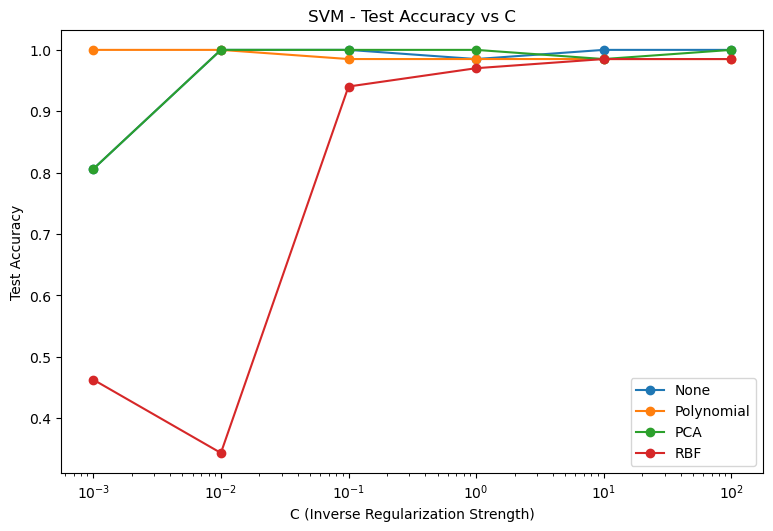

,Transformation,C,Train_Accuracy,Test_Accuracy,Precision,Recall,F1,Gap
0,None,0.001,0.7932,0.8060,0.6693,0.8060,0.7258,-0.0127
1,None,0.010,0.9925,1.0000,1.0000,1.0000,1.0000,-0.0075
2,None,0.100,0.9962,1.0000,1.0000,1.0000,1.0000,-0.0038
3,None,1.000,0.9925,0.9851,0.9861,0.9851,0.9852,0.0074
4,None,10.000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
5,None,100.000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
6,Polynomial,0.001,0.9699,1.0000,1.0000,1.0000,1.0000,-0.0301
7,Polynomial,0.010,0.9962,1.0000,1.0000,1.0000,1.0000,-0.0038
8,Polynomial,0.100,0.9962,0.9851,0.9861,0.9851,0.9852,0.0112
9,Polynomial,1.000,1.0000,0.9851,0.9861,0.9851,0.9852,0.0149


,Transformation,C,Train_Accuracy,Test_Accuracy,Precision,Recall,F1,Gap
0,None,0.001000,0.793200,0.806000,0.669300,0.806000,0.725800,-0.012700
1,None,0.010000,0.992500,1.000000,1.000000,1.000000,1.000000,-0.007500
2,None,0.100000,0.996200,1.000000,1.000000,1.000000,1.000000,-0.003800
3,None,1.000000,0.992500,0.985100,0.986100,0.985100,0.985200,0.007400
4,None,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,None,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,Polynomial,0.001000,0.969900,1.000000,1.000000,1.000000,1.000000,-0.030100
7,Polynomial,0.010000,0.996200,1.000000,1.000000,1.000000,1.000000,-0.003800
8,Polynomial,0.100000,0.996200,0.985100,0.986100,0.985100,0.985200,0.011200
9,Polynomial,1.000000,1.000000,0.985100,0.986100,0.985100,0.985200,0.014900


\begin{table}
\centering
\caption{SVM Performance Across Transformations}
\label{tab:svm_results}
\begin{tabular}{lrrrrrrr}
\toprule
Transformation &       C &  Train\_Accuracy &  Test\_Accuracy &  Precision &  Recall &     F1 &     Gap \\
\midrule
          None &   0.001 &          0.7932 &         0.8060 &     0.6693 &  0.8060 & 0.7258 & -0.0127 \\
          None &   0.010 &          0.9925 &         1.0000 &     1.0000 &  1.0000 & 1.0000 & -0.0075 \\
          None &   0.100 &          0.9962 &         1.0000 &     1.0000 &  1.0000 & 1.0000 & -0.0038 \\
          None &   1.000 &          0.9925 &         0.9851 &     0.9861 &  0.9851 & 0.9852 &  0.0074 \\
          None &  10.000 &          1.0000 &         1.0000 &     1.0000 &  1.0000 & 1.0000 &  0.0000 \\
          None & 100.000 &          1.0000 &         1.0000 &     1.0000 &  1.0000 & 1.0000 &  0.0000 \\
    Polynomial &   0.001 &          0.9699 &         1.0000 &     1.0000 &  1.0000 & 1.0000 & -0.0301 \\
    Polynomial &

C:\Users\evanh\AppData\Local\Temp\ipykernel_40756\1324405223.py:192: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = results_df.to_latex(


In [55]:
# SUPPORT VECTOR MACHINE with Transformations (Tuning C directly)

from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Define parameters to test
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Small C = strong regularization
transformations = ['None', 'Polynomial', 'PCA', 'RBF']
max_iter = 1000  # Max iterations for SVM

# Create empty list to store results
results = []

# 0. No transformation
for C in C_values:
    model = SVC(kernel='linear', C=C, class_weight='balanced', max_iter=max_iter)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    results.append({
        'Transformation': 'None',
        'C': C,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Gap': train_acc - test_acc
    })

# 1. Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
for C in C_values:
    model = SVC(kernel='linear', C=C, class_weight='balanced', max_iter=max_iter)
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    train_acc = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test_poly)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    results.append({
        'Transformation': 'Polynomial',
        'C': C,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Gap': train_acc - test_acc
    })

# 2. PCA transformation
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
for C in C_values:
    model = SVC(kernel='linear', C=C, class_weight='balanced', max_iter=max_iter)
    model.fit(X_train_pca, y_train)

    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    results.append({
        'Transformation': 'PCA',
        'C': C,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Gap': train_acc - test_acc
    })

# 3. RBF transformation
rbf_feature = RBFSampler(gamma=1, random_state=42)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf = rbf_feature.transform(X_test)
for C in C_values:
    model = SVC(kernel='linear', C=C, class_weight='balanced', max_iter=max_iter)
    model.fit(X_train_rbf, y_train)

    y_train_pred = model.predict(X_train_rbf)
    y_test_pred = model.predict(X_test_rbf)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    results.append({
        'Transformation': 'RBF',
        'C': C,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Gap': train_acc - test_acc
    })

# --- Create DataFrame
results_df = pd.DataFrame(results)

# --- Create visualizations
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# 1. Plot Test Accuracy vs C
plt.subplot(2, 2, 1)
for transform in transformations:
    df_trans = results_df[results_df['Transformation'] == transform]
    plt.plot(df_trans['C'], df_trans['Test_Accuracy'], marker='o', label=f'{transform}')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Test Accuracy')
plt.title('SVM - Test Accuracy vs C')
plt.legend()
'''
# 2. Plot Train-Test Gap vs C
plt.subplot(2, 2, 2)
for transform in transformations:
    df_trans = results_df[results_df['Transformation'] == transform]
    plt.plot(df_trans['C'], df_trans['Gap'], marker='o', label=f'{transform}')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Train-Test Gap')
plt.title('SVM - Overfitting Gap vs C')
plt.legend()

# 3. Plot Precision vs C
plt.subplot(2, 2, 3)
for transform in transformations:
    df_trans = results_df[results_df['Transformation'] == transform]
    plt.plot(df_trans['C'], df_trans['Precision'], marker='o', label=f'{transform}')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Precision')
plt.title('SVM - Precision vs C')
plt.legend()

# 4. Plot Recall vs C
plt.subplot(2, 2, 4)
for transform in transformations:
    df_trans = results_df[results_df['Transformation'] == transform]
    plt.plot(df_trans['C'], df_trans['Recall'], marker='o', label=f'{transform}')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Recall')
plt.title('SVM - Recall vs C')
plt.legend()
'''
plt.tight_layout()
plt.show()

# --- Final Table Display

from IPython.display import display

results_df = results_df.round({
    'Train_Accuracy': 4,
    'Test_Accuracy': 4,
    'Precision': 4,
    'Recall': 4,
    'F1': 4,
    'Gap': 4
})
display(results_df)

# Highlight best test accuracy
def highlight_best_test_accuracy(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_results = results_df.style.apply(highlight_best_test_accuracy, subset=['Test_Accuracy'], axis=0)
display(styled_results)

# --- Optional: Export LaTeX Table for Report
latex_table = results_df.to_latex(
    index=False,
    caption='SVM Performance Across Transformations',
    label='tab:svm_results'
)
print(latex_table)
